Now drawing  1


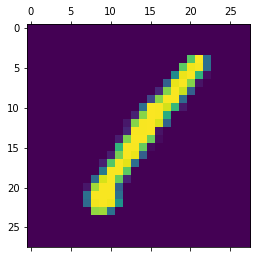

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv").values

def draw(number_row, number):
    print("Now drawing ", number)
    image = np.zeros((28, 28))
    
    i = 0
    for j in range(28):
        k = i + 28
        image[j] = number_row[i:k]
        i = k
        
    plt.matshow(image)

draw(data[0][1:], data[0][0])
    

In [75]:
# first, lets check th weights on those yellow inputs vs the purple
# for row 5, it seems like we can go from column 15 to 25 and have captured purple to green to yellow and back
print(data[0][5 * 28 + 18:5 * 28 + 25])
      
# purples are 0, greens are like \d\d-200 and yellows are 200+

[  0   0 191 250 253  93   0]


In [ ]:
# well keep this in mind since we will be using this data row later to see how weights shift


In [18]:
# sweet... lets make our truths array

truths = np.zeros((10, 10))
for i in range(10):
    truths[i][i] = 1

print(truths)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [116]:
# next, lets make our weights, I like to keep them uniform so I can be sure they are start from the same ground
weights = np.zeros((784, 10))
for i in range(10):
    for j in range(784):
        weights[j][i] = 0.1

print(weights, "\n")
        
# I chose weights 0.1 because we are going to try to predict 1, so it should be smaller so it can shift up 
# and down appropriately(we have to apply alpha to the weight deltas later

# our input data has 24000 rows and maybe like 2400 of each image
# let's first see what a sample run of neural nets look like for 3 runs for "one"(images)

# first lets revisit that row we checked to see color values earlier
print(data[0][5 * 28 + 18:5 * 28 + 25], "\n")

for i in range(3):
    deltas = [0] * 10
    inputs = np.array(data[0][1:])
    number = data[0][0]
    truth = truths[number]
    
    preds = inputs.dot(weights)
    print ("preds", preds)
    for j in range(10):
        deltas[j] = preds[j] - truth[j]
    
    for j in range(10):
        for k in range(784):
            weights[k][j] -= deltas[j] * inputs[k]
    
    sig_weights = weights.T[number]
    print("sig_weights", sig_weights[5 * 28 + 17:5 * 28 + 24], "\n")    

[[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]] 

[  0   0 191 250 253  93   0] 

preds [1664.9 1664.9 1664.9 1664.9 1664.9 1664.9 1664.9 1664.9 1664.9 1664.9]
sig_weights [ 1.000000e-01  1.000000e-01 -3.178048e+05 -4.159749e+05 -4.209666e+05
 -1.547426e+05  1.000000e-01] 

preds [-6.03898855e+09 -6.03536131e+09 -6.03898855e+09 -6.03898855e+09
 -6.03898855e+09 -6.03898855e+09 -6.03898855e+09 -6.03898855e+09
 -6.03898855e+09 -6.03898855e+09]
sig_weights [1.00000000e-01 1.00000000e-01 1.15275369e+12 1.50883991e+12
 1.52694599e+12 5.61288447e+11 1.00000000e-01] 

preds [2.19048487e+16 2.18916919e+16 2.19048487e+16 2.19048487e+16
 2.19048487e+16 2.19048487e+16 2.19048487e+16 2.19048487e+16
 2.19048487e+16 2.19048487e+16]
sig_weights [ 1.00000000e-01  1.00000000e-01 -4.18131200e+18 -5.47292146e+18
 -5.53859652e+18 -2.03592678e+18  1.00000000e-01] 



In [126]:
# woah... imagine if we did this 2400 times, we are going to have overflow...
# weight delta is big because there are a good amount of yellows and when you matrix multiply inputs by weights
# the preds is pretty big(1664.9 in the first run), then it gets bigger since our weights are growing like crazy
# to shift into the correct prediction 1. 

# This overshot to shift weights toward one is crazy,
# you can see if overshot go from a huge negative to positive then to negative again
# this means we need to alpha the changes... lets do this by toning down the inputs...

#reset weights
weights = np.zeros((784, 10))
for i in range(10):
    for j in range(784):
        weights[j][i] = 0.1

print(weights, "\n")

print(data[0][5 * 28 + 18:5 * 28 + 25], "\n")

for i in range(2400):
    deltas = [0] * 10
    inputs = np.array(data[0][1:])
    # tone down the input
    alpha = .0001
    inputs = inputs * alpha
    number = data[0][0]
    truth = truths[number]
    
    preds = inputs.dot(weights)
    
    for j in range(10):
        deltas[j] = preds[j] - truth[j]
    
    for j in range(10):
        for k in range(784):
            weights[k][j] -= deltas[j] * inputs[k]
    
    if (i % 400 == 0):
        print ("preds", preds)
        sig_weights = weights.T[number]
        print("sig_weights", sig_weights[5 * 28 + 17:5 * 28 + 24], "\n") 

[[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]] 

[  0   0 191 250 253  93   0] 

preds [0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649
 0.16649]
sig_weights [0.1        0.1        0.11592004 0.12083775 0.1210878  0.10775164
 0.1       ] 

preds [6.35489954e-08 9.99999682e-01 6.35489954e-08 6.35489954e-08
 6.35489954e-08 6.35489954e-08 6.35489954e-08 6.35489954e-08
 6.35489954e-08 6.35489954e-08]
sig_weights [0.1        0.1        0.53890229 0.67447944 0.68137319 0.31370635
 0.1       ] 

preds [2.42515968e-14 1.00000000e+00 2.42515968e-14 2.42515968e-14
 2.42515968e-14 2.42515968e-14 2.42515968e-14 2.42515968e-14
 2.42515968e-14 2.42515968e-14]
sig_weights [0.1        0.1        0.53890245 0.67447965 0.68137341 0.31370643
 0.1       ] 

preds [1.65340831e-17 1.00000000e+00 1.65340831e-17 1.65340831e-17
 1.65340831e-17 

In [110]:
# hmm.. seems good to me, its prediction is shifting well without the overshotting and it found the good 
# weights relatively fast at around 400 iterations (9.99999682) I mean this makes sense because
# the preds shift less than 1. for example .16649.

# I will discuss some problems with this gradient descent approach when using multiple neurons(784 inputs with 
# 10 weights each connecting to 10 output neurons)
# and also why it is okay and ignorable in the big grand scheme of it

# first lets run the whole 24000... and then show the weight images and also predictions


Now drawing  0
Now drawing  1
Now drawing  2
Now drawing  3
Now drawing  4
Now drawing  5
Now drawing  6
Now drawing  7
Now drawing  8
Now drawing  9
----------------------------------------------------------------

truth is  1
preds [-0.09860515  0.49035493  0.04994828  0.10230354 -0.00934458  0.04201023
 -0.10170793 -0.100764    0.29659258  0.01612875]
----------------------------------------------------------------

----------------------------------------------------------------

truth is  0
preds [ 0.99006652 -0.11921253  0.05117487  0.13612536 -0.13664287 -0.16788953
  0.1320512   0.12587443  0.08652152 -0.04840506]
----------------------------------------------------------------

----------------------------------------------------------------

truth is  1
preds [-0.00781553  0.94110986 -0.01046954  0.02989412 -0.09191715  0.01481618
  0.06115131  0.00438148  0.03356738 -0.00660174]
----------------------------------------------------------------

-------------------------------

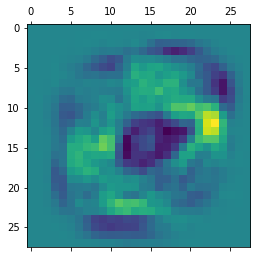

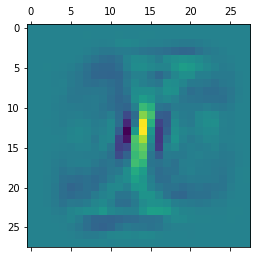

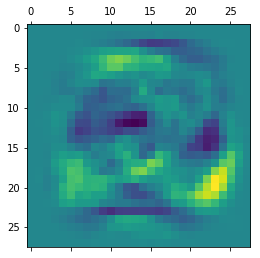

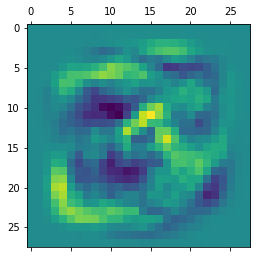

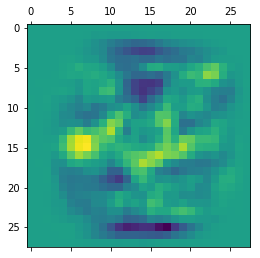

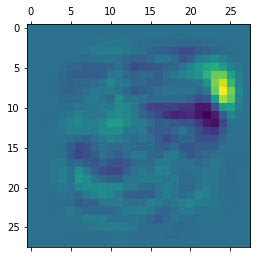

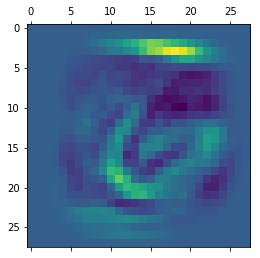

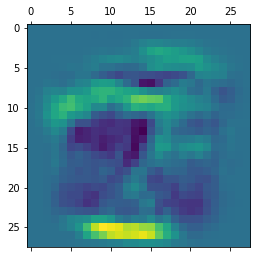

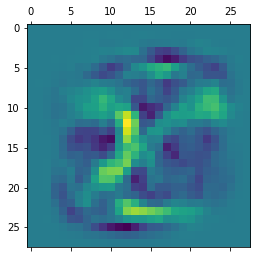

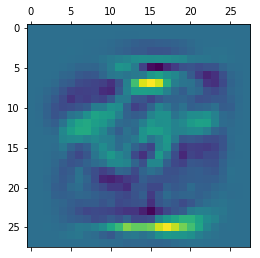

In [129]:
weights = np.zeros((784, 10))
for i in range(10):
    for j in range(784):
        weights[j][i] = 0.1

for i in range(24000):
    deltas = [0] * 10
    inputs = np.array(data[i][1:])
    inputs = inputs * .0001
    number = data[i][0]
    truth = truths[number]
    
    preds = inputs.dot(weights)
    
    for j in range(10):
        deltas[j] = preds[j] - truth[j]
    
    for j in range(10):
        for k in range(784):
            weights[k][j] -= deltas[j] * inputs[k]
    

for i, weight in enumerate(weights.T):
    draw(weight, i)
    
for i in range(20):
    inputs = np.array(data[i][1:])
    inputs = inputs * .0001
    truth = data[i][0]

    preds = inputs.dot(weights)
    print("----------------------------------------------------------------\n")
    print("truth is ", truth)
    print("preds", preds)
    print("----------------------------------------------------------------\n")


In [ ]:
# as you can see, the weights seem closely related to their numbers..
# this means that when predicting, the correspondent inputs vs weights will help the prediction to be closer
# to one other than the rest because if you remember back to our first print outs with alpha 

'''
preds [0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649
 0.16649]
sig_weights [0.1        0.1        0.11592004 0.12083775 0.1210878  0.10775164
 0.1       ] 

preds [6.35489954e-08 9.99999682e-01 6.35489954e-08 6.35489954e-08
 6.35489954e-08 6.35489954e-08 6.35489954e-08 6.35489954e-08
 6.35489954e-08 6.35489954e-08]
sig_weights [0.1        0.1        0.53890229 0.67447944 0.68137319 0.31370635
 0.1       ] 

preds [2.42515968e-14 1.00000000e+00 2.42515968e-14 2.42515968e-14
 2.42515968e-14 2.42515968e-14 2.42515968e-14 2.42515968e-14
 2.42515968e-14 2.42515968e-14]
sig_weights [0.1        0.1        0.53890245 0.67447965 0.68137341 0.31370643
 0.1       ] 
'''

# you can see that in the sig_weights, the good weights got shifted up due to the derivative of our error curve
# if you actually plotted our error curve on a graph you can see that the weight weight delta
# (i.e) deltas[j] * inputs[k] is the (1/2)derivate at the point where weight is the x
# the error curve is the quadratic line which is plotted by error = (input(weight) - truth) ** 2
# 
''' preds = inputs.dot(weights)
    
    for j in range(10):
        deltas[j] = preds[j] - truth[j]
    
    for j in range(10):
        for k in range(784):
            weights[k][j] -= deltas[j] * inputs[k]'''

# our weight delta correctly predicts which way to shift the weight towards because it is the derivative
# using that we shift it towards close to where error will be zero where error = 0

# This means that since for the non truthful weights on the neurons,
# their truth is 0, the corresponding weights get shifted well towards where error will be close to 0
# i.e when prediction is 0 since error = ((pred = 0) - 0)) ** 2 = 0
# thats why you see that the prediction goes from .16649 to something ridiculously small

# we can also see from our truth and prediction prints that everything is good, except 5
# why would that be? lets test it out below

In [131]:
for i in range(20):
    truth = data[i][0]
    if (truth == 5) :
        inputs = np.array(data[i][1:])
        inputs = inputs * .0001


        preds = inputs.dot(weights)
        print("----------------------------------------------------------------\n")
        print("truth is ", truth)
        print("preds", preds)
        print("----------------------------------------------------------------\n")




# hmm.. the first one is good, index 5 is closest to one, but why is the second on messed up?


----------------------------------------------------------------

truth is  5
preds [-0.02775465 -0.09462831 -0.17135325  0.32079294  0.15758746  0.42067134
  0.066932   -0.09589587  0.16828619  0.1667945 ]
----------------------------------------------------------------

----------------------------------------------------------------

truth is  5
preds [ 0.01640276  0.01144566  0.05062101  0.11484779  0.15073982  0.29580334
  0.70504752 -0.16401496  0.13784444 -0.0782193 ]
----------------------------------------------------------------



Now drawing  5
Now drawing  5


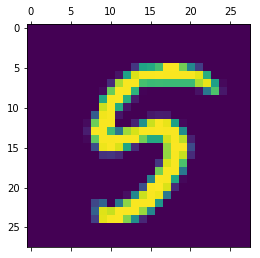

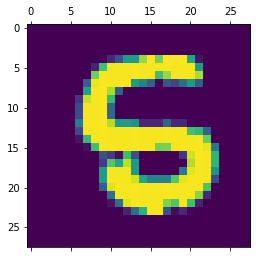

In [133]:
# the reason is because it looks so closely to six.. I mean I would also be confused, can't really blame to 
# computer at this point, gotta blame the number.. check it out.
for i in range(20):
    truth = data[i][0]
    if (truth == 5) :
        inputs = np.array(data[i][1:])
        inputs = inputs * .0001
        draw(inputs, data[i][0])



In [134]:
# LOL, the first five is definitely a five, but the second one looks more like a six to me... 
# anyways, moving onto some problems with this gradient descent approach below(at least for this mnist exercise)

In [ ]:
# effects to other neuron weights for  calculations of different truths as well as overlaps
# for example, we saw 
'''preds [0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649 0.16649
 0.16649]
sig_weights [0.1        0.1        0.11592004 0.12083775 0.1210878  0.10775164
 0.1       ] 

preds [6.35489954e-08 9.99999682e-01 6.35489954e-08 6.35489954e-08
 6.35489954e-08 6.35489954e-08 6.35489954e-08 6.35489954e-08
 6.35489954e-08 6.35489954e-08]
sig_weights [0.1        0.1        0.53890229 0.67447944 0.68137319 0.31370635
 0.1       ] 

preds [2.42515968e-14 1.00000000e+00 2.42515968e-14 2.42515968e-14
 2.42515968e-14 2.42515968e-14 2.42515968e-14 2.42515968e-14
 2.42515968e-14 2.42515968e-14]
sig_weights [0.1        0.1        0.53890245 0.67447965 0.68137341 0.31370643
 0.1       ] 
'''

# yes, its true that weights got shifted towards the right way and thus preds came out more correctly
# however, this affected weights to the non relevant weights because for numbers that overlapp, if their
# weights have been shifted down a lot prior to learning for the correct weight, it will need to shift back up
# possibly and if their isn't enough examples then the network weights can be in a bad state for those
# numbers that didn't let their weights learn a lot.

# what I'm saying is that, it is important to have a diverse variety of inputs to have a more balanced neuralnet
# however, if the predictions are off for those, then the shifts will be bigger since the 
# error is higher, so yes the neural net does
# try its best to fix its weights, but a diverse and balanced input is the best

# This way also, things can be more generalized, instead of trying to "learn" a certain exact same numbers
# whether its learning 1 number of the same exact shape, or learning a couple of numbers of the same shape
# multiple times. A more generalized neural net seems to do better in my opinion, at least for mnist